In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
import pickle

In [6]:
df=pd.read_csv('../Risk_Prediction/Ayurveda Sheet.csv')

In [7]:
df.head()

,prognosis,Sneezing,Runny_Nose,Headache,High Fever,Bodyache,Blocked_Nose,Tonsils,Throught_Iritation,Fatigue,...,Increased Appetite,Sweating,Hair loss,Photosensitivity,Oral ulcers,Dosha,Risk,Risk for prognosis,Medicine,Unnamed: 78
0,Allergy,1,1,0,0,0,0,0,0,0,...,0,NaN,0,0,0,"Watha, Kapha",High,NaN,"Turmeric and honey mixture, Ginger tea, Black ...",NaN
1,Allergy,1,1,0,0,0,0,0,0,0,...,0,NaN,0,0,0,"Watha, Kapha",High,NaN,"Turmeric and honey mixture, Ginger tea, Black ...",NaN
2,Allergy,1,1,0,0,0,0,0,0,0,...,0,NaN,0,0,0,"Watha, Kapha",High,NaN,"Turmeric and honey mixture, Ginger tea, Black ...",NaN
3,Allergy,1,1,0,0,0,0,0,0,0,...,0,NaN,0,0,0,"Watha, Kapha",High,NaN,"Turmeric and honey mixture, Ginger tea, Black ...",NaN
4,Allergy,1,1,0,0,0,0,0,0,0,...,0,NaN,0,0,0,"Watha, Kapha",High,NaN,"Turmeric and honey mixture, Ginger tea, Black ...",NaN


In [8]:
# Remove duplicate rows
df = df.drop_duplicates()

In [9]:
df.shape

(815, 79)

In [10]:
df.head()

,prognosis,Sneezing,Runny_Nose,Headache,High Fever,Bodyache,Blocked_Nose,Tonsils,Throught_Iritation,Fatigue,...,Increased Appetite,Sweating,Hair loss,Photosensitivity,Oral ulcers,Dosha,Risk,Risk for prognosis,Medicine,Unnamed: 78
0,Allergy,1,1,0,0,0,0,0,0,0,...,0,NaN,0,0,0,"Watha, Kapha",High,NaN,"Turmeric and honey mixture, Ginger tea, Black ...",NaN
1,Allergy,1,1,0,0,0,0,0,0,0,...,0,NaN,0,0,0,"Watha, Kapha",High,NaN,"Turmeric and honey mixture, Ginger tea, Black ...",NaN
4,Allergy,1,1,0,0,0,0,0,0,0,...,0,NaN,0,0,0,"Watha, Kapha",High,NaN,"Turmeric and honey mixture, Ginger tea, Black ...",NaN
5,Allergy,1,1,0,0,0,0,0,0,0,...,0,NaN,0,0,0,"Watha, Kapha",High,NaN,"Turmeric and honey mixture, Ginger tea, Black ...",NaN
8,Allergy,1,1,0,0,0,0,0,0,0,...,0,0.0,0,0,0,"Watha, Kapha",High,NaN,"Turmeric and honey mixture, Ginger tea, Black ...",NaN


In [11]:
df=df.drop(['prognosis','Medicine','Risk','Risk for prognosis','Unnamed: 78'] , axis=1)

In [12]:
df.isnull().sum()

Sneezing            0
Runny_Nose          0
Headache            0
High Fever          0
Bodyache            0
                   ..
Sweating            4
Hair loss           0
Photosensitivity    0
Oral ulcers         0
Dosha               0
Length: 74, dtype: int64

In [13]:
df = df.copy()
df['Sweating'] = df['Sweating'].fillna(0).astype(int)

In [14]:
df.isnull().sum()

Sneezing            0
Runny_Nose          0
Headache            0
High Fever          0
Bodyache            0
                   ..
Sweating            0
Hair loss           0
Photosensitivity    0
Oral ulcers         0
Dosha               0
Length: 74, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 815 entries, 0 to 998
Data columns (total 74 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Sneezing                         815 non-null    int64 
 1   Runny_Nose                       815 non-null    int64 
 2   Headache                         815 non-null    int64 
 3   High Fever                       815 non-null    int64 
 4   Bodyache                         815 non-null    int64 
 5   Blocked_Nose                     815 non-null    int64 
 6   Tonsils                          815 non-null    int64 
 7   Throught_Iritation               815 non-null    int64 
 8   Fatigue                          815 non-null    int64 
 9   Less_of_appetite                 815 non-null    int64 
 10  Eye Redness                      815 non-null    int64 
 11  Lethargy                         815 non-null    int64 
 12  Dry_Cough                        815 non-

In [16]:
# Get the number of unique values in the 'Dosha' column
unique_count = df['Dosha'].nunique()
print(unique_count)

15


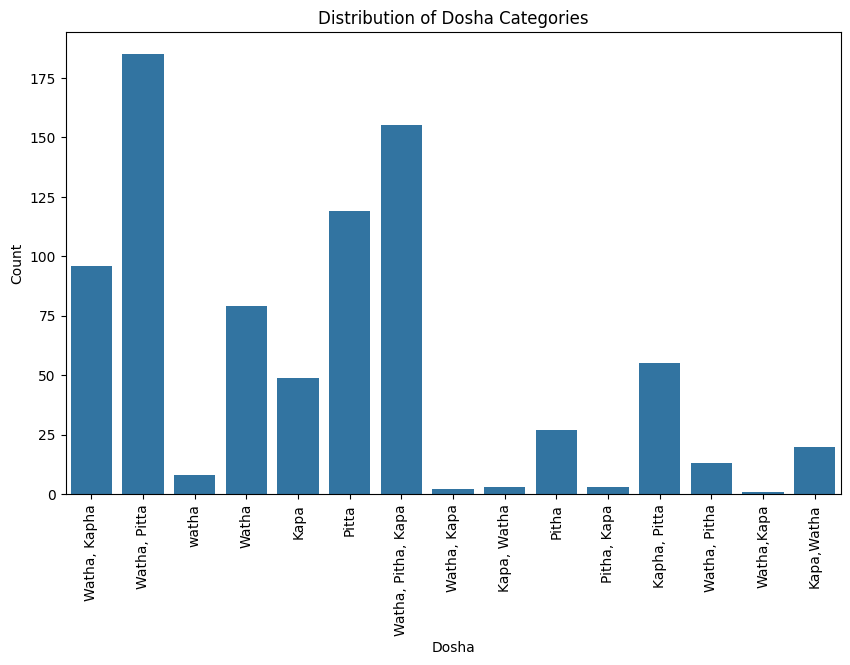

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a bar graph using seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='Dosha', data=df)

# Add titles and labels
plt.title('Distribution of Dosha Categories')
plt.xlabel('Dosha')
plt.ylabel('Count')

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [18]:
# Find unique values in the 'Dosha' column
unique_dosha = df['Dosha'].unique()

print(unique_dosha)

['Watha, Kapha' 'Watha, Pitta' 'watha' 'Watha' 'Kapa' 'Pitta'
 'Watha, Pitha, Kapa' 'Watha, Kapa' 'Kapa, Watha' 'Pitha' 'Pitha, Kapa'
 'Kapha, Pitta' 'Watha, Pitha' 'Watha,Kapa' 'Kapa,Watha']


In [19]:
# Applying proper naming convention for 'Dosha' column

# 1. 'Watha, Kapha' , 'Watha, Kapa' , 'Kapa, Watha' -->> 'Vata, Kapha'
# 2. 'watha' , 'Watha' -->> 'Vata'
# 3. 'Pitha' -->>  'Pitta'
# 4. 'Pitha, Kapa' , 'Kapha, Pitta' -->> 'Pitta, Kapha'
# 5. 'Kapa' -->> 'Kapha'
# 6. 'Watha, Pitha, Kapa' -->> 'Vata, Pitta, Kapha'
# 7. 'Watha, Pitta' , 'Watha, Pitha' -->> 'Vata, Pitta'

In [20]:
# Dictionary for mapping incorrect values to correct ones
dosha_corrections = {
    'Watha, Kapha': 'Vata, Kapha',
    'Watha, Kapa': 'Vata, Kapha',
    'Watha,Kapa' : 'Vata, Kapha',
    'Kapa, Watha': 'Vata, Kapha',
    'Kapa,Watha' :  'Vata, Kapha',
    'watha': 'Vata',
    'Watha': 'Vata',
    'Pitha': 'Pitta',
    'Pitha, Kapa': 'Pitta, Kapha',
    'Kapha, Pitta': 'Pitta, Kapha',
    'Kapa': 'Kapha',
    'Watha, Pitha, Kapa': 'Vata, Pitta, Kapha',
    'Watha, Pitta': 'Vata, Pitta',
    'Watha, Pitha': 'Vata, Pitta',
    
}

# Replace the incorrect values in the 'Dosha' column using the dictionary
df['Dosha'] = df['Dosha'].replace(dosha_corrections)

# Verify the changes
unique_dosha = df['Dosha'].unique()
print(unique_dosha)


['Vata, Kapha' 'Vata, Pitta' 'Vata' 'Kapha' 'Pitta' 'Vata, Pitta, Kapha'
 'Pitta, Kapha']


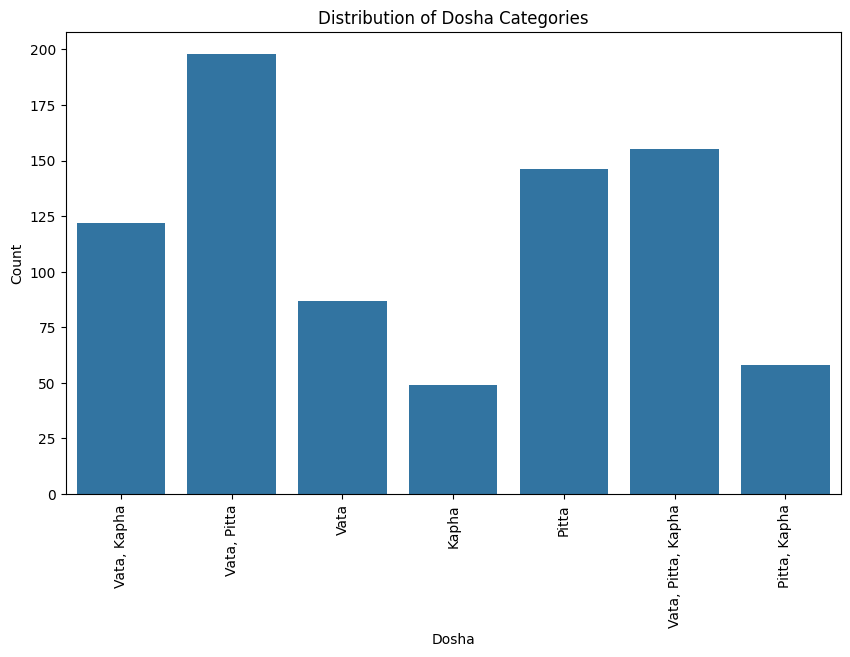

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a bar graph using seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='Dosha', data=df)

# Add titles and labels
plt.title('Distribution of Dosha Categories')
plt.xlabel('Dosha')
plt.ylabel('Count')

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [22]:
# After cleaning the dataset, save it to a new CSV file
df.to_csv('cleaned_dosha_dataset.csv', index=False)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 815 entries, 0 to 998
Data columns (total 74 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Sneezing                         815 non-null    int64 
 1   Runny_Nose                       815 non-null    int64 
 2   Headache                         815 non-null    int64 
 3   High Fever                       815 non-null    int64 
 4   Bodyache                         815 non-null    int64 
 5   Blocked_Nose                     815 non-null    int64 
 6   Tonsils                          815 non-null    int64 
 7   Throught_Iritation               815 non-null    int64 
 8   Fatigue                          815 non-null    int64 
 9   Less_of_appetite                 815 non-null    int64 
 10  Eye Redness                      815 non-null    int64 
 11  Lethargy                         815 non-null    int64 
 12  Dry_Cough                        815 non-